In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
from numpy.polynomial.polynomial import Polynomial

In [48]:
import sys

def custom_displayhook(value):
    # Check if the value is a floating-point number in scientific notation
    if isinstance(value, float) and abs(value) < 1e-3:
        formatted_value = f'{value:.30f}'
    else:
        formatted_value = repr(value)  # Use the default representation for other types
        
    # Print the formatted value
    sys.stdout.write(formatted_value)
    sys.stdout.write('\n')

# Assign the custom displayhook function to sys.displayhook
sys.displayhook = custom_displayhook

# Task 1: Data Manipulation
## 1.1. Data Import

In [49]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')
# Display the first few rows of the dataset for initial inspection
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 1.2. Understanding and Manipulation

In [50]:
#check datatype 

data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [51]:
#read data description
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [52]:
# Checking for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [53]:
# Check distinct value in object column
object_columns = data.select_dtypes(include=['object'])

for column in object_columns:
    distinct_values = data[column].unique()
    total_count = len(data[column])  # Get the total count of values in the column
    print(f"Distinct values in {column}:")
    for value in distinct_values:
        count_value = (data[column] == value).sum()
        percentage = (count_value / total_count) * 100
        print(f"Value: {value}, Count: {count_value}, Percentage: {percentage:.2f}%")
    print()

Distinct values in job:
Value: housemaid, Count: 1060, Percentage: 2.57%
Value: services, Count: 3969, Percentage: 9.64%
Value: admin., Count: 10422, Percentage: 25.30%
Value: blue-collar, Count: 9254, Percentage: 22.47%
Value: technician, Count: 6743, Percentage: 16.37%
Value: retired, Count: 1720, Percentage: 4.18%
Value: management, Count: 2924, Percentage: 7.10%
Value: unemployed, Count: 1014, Percentage: 2.46%
Value: self-employed, Count: 1421, Percentage: 3.45%
Value: unknown, Count: 330, Percentage: 0.80%
Value: entrepreneur, Count: 1456, Percentage: 3.54%
Value: student, Count: 875, Percentage: 2.12%

Distinct values in marital:
Value: married, Count: 24928, Percentage: 60.52%
Value: single, Count: 11568, Percentage: 28.09%
Value: divorced, Count: 4612, Percentage: 11.20%
Value: unknown, Count: 80, Percentage: 0.19%

Distinct values in education:
Value: basic.4y, Count: 4176, Percentage: 10.14%
Value: high.school, Count: 9515, Percentage: 23.10%
Value: basic.6y, Count: 2292, Pe

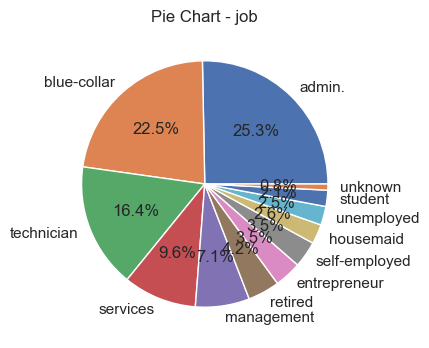

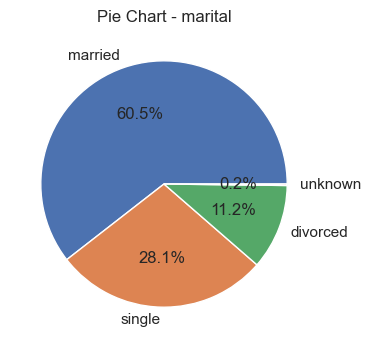

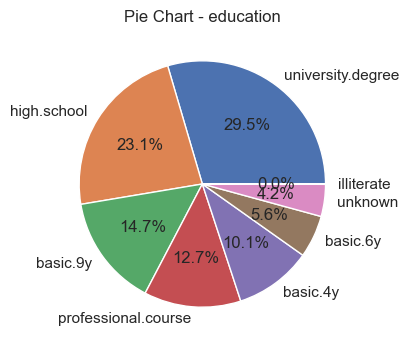

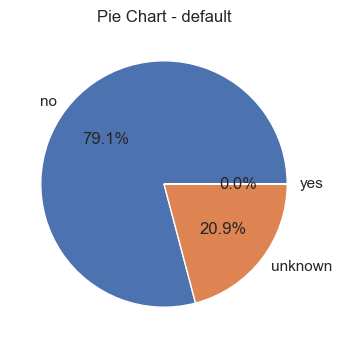

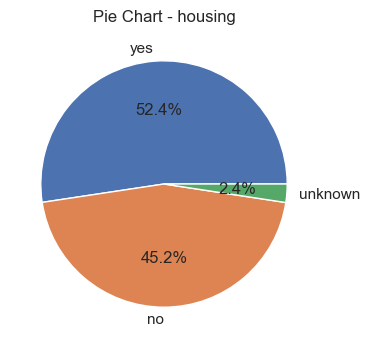

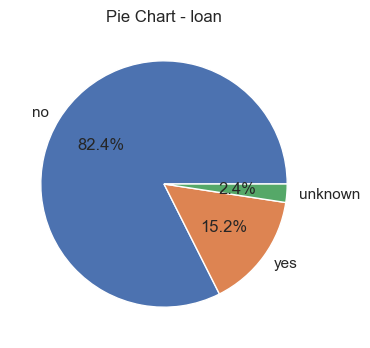

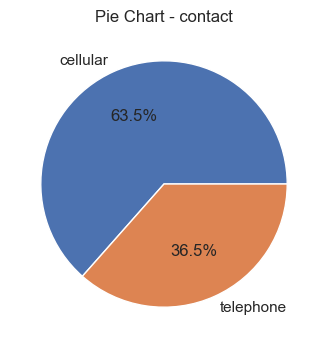

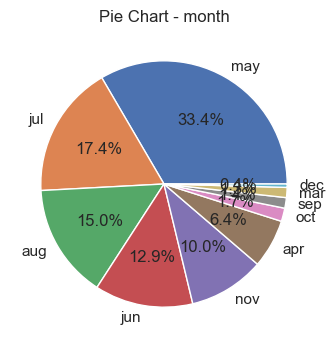

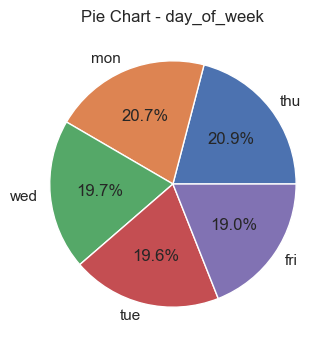

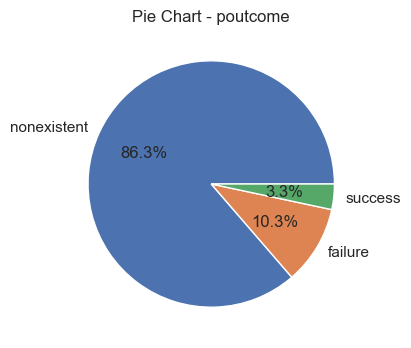

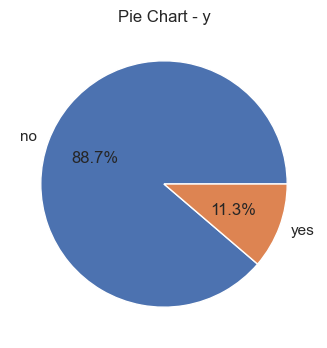

In [54]:
object_columns = data.select_dtypes(include=['object'])

for column in object_columns:
    value_counts = data[column].value_counts()
    values = value_counts.index.tolist()
    counts = value_counts.tolist()

    # Creating a DataFrame for plotting
    df = pd.DataFrame({'values': values, 'counts': counts})

    # Plotting the pie chart
    plt.figure(figsize=(12, 4))
    plt.pie(df['counts'], labels=df['values'], autopct='%1.1f%%')
    plt.title(f'Pie Chart - {column}')
    plt.show()

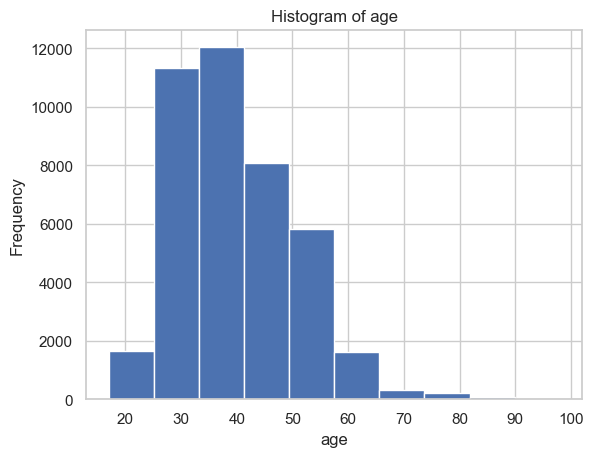

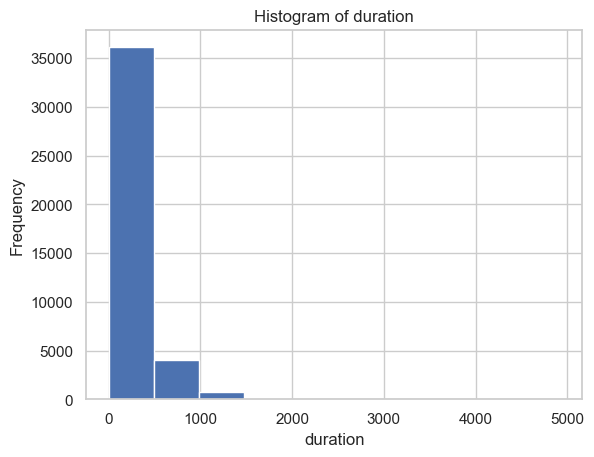

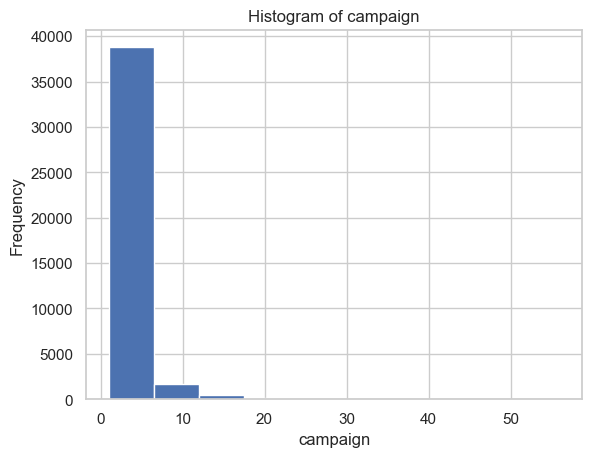

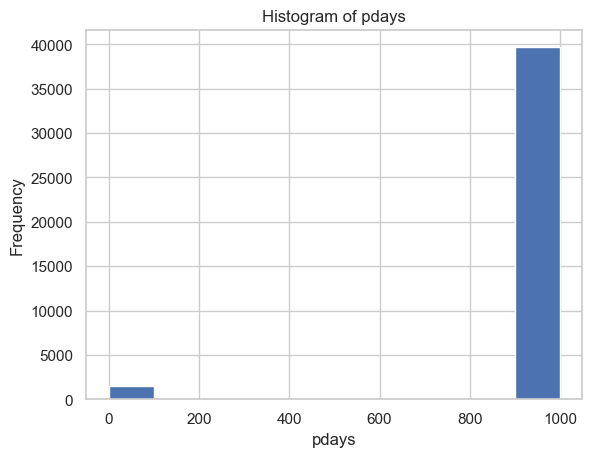

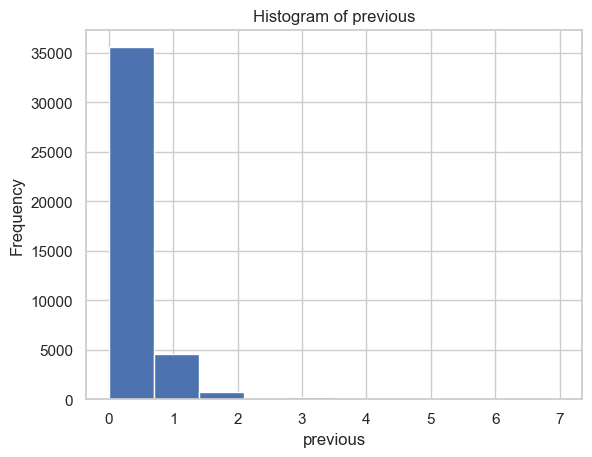

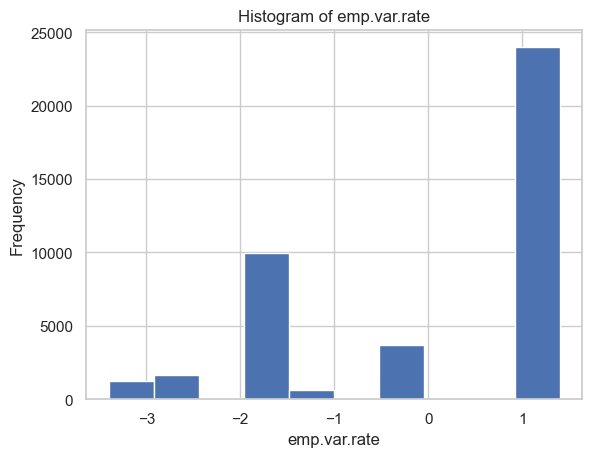

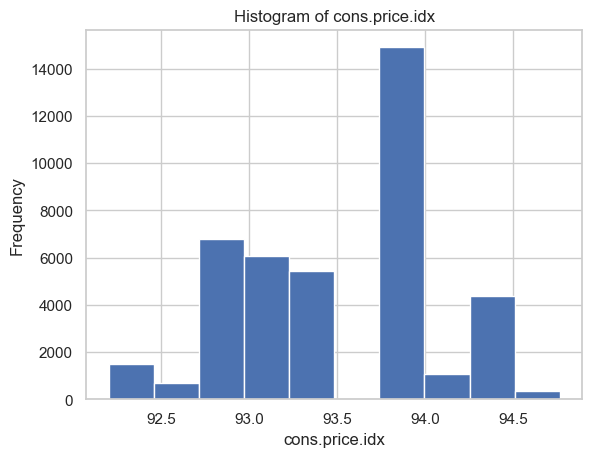

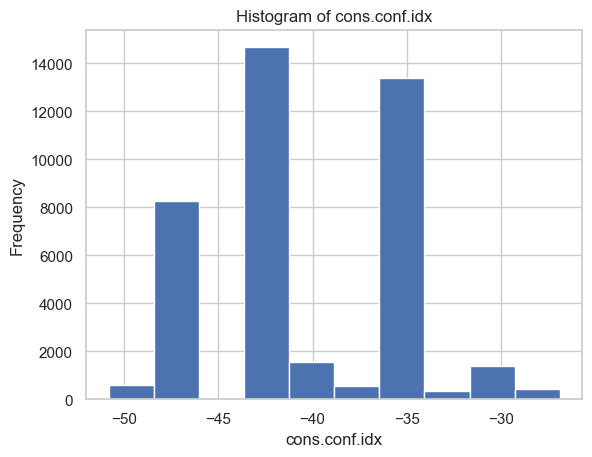

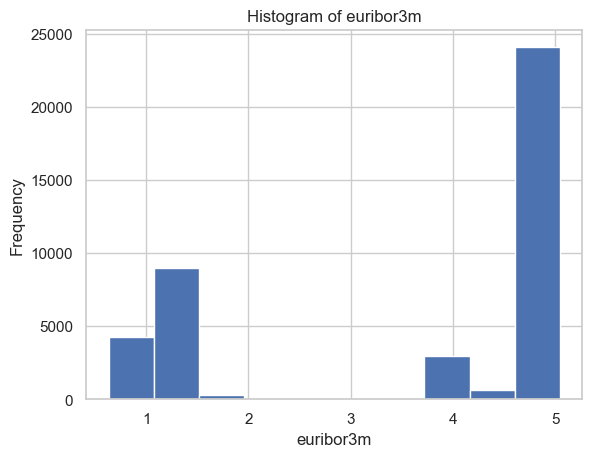

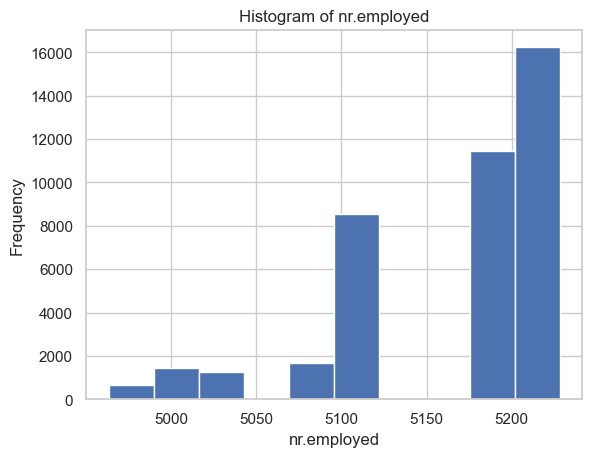

In [55]:
# Select the integer and float columns
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Plotting histograms for each numeric column
for column in numeric_cols:
    plt.hist(data[column], bins=10)  # Adjust the number of bins as needed
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
    

## 1.3. Data Sampling

In [56]:
# Set the random seed for reproducibility
random_seed = 1996

# Splitting the dataset into 80% training data and 20% test data (which will be our sample)
_, sample_data = train_test_split(data, test_size=0.20, random_state=random_seed)

# Display the first few rows of the sampled data
sample_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
36367,24,student,single,high.school,no,no,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no
740,48,admin.,divorced,high.school,no,no,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
16821,23,blue-collar,single,basic.9y,no,yes,no,cellular,jul,thu,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
27243,39,services,married,high.school,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no
33556,32,admin.,single,university.degree,no,yes,no,cellular,may,tue,...,2,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no


In [57]:
sample_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000
mean,40.092862,263.996480,2.581209,965.728575,0.161083,0.118827,93.589017,-40.417444,3.666568,5168.329097
std,10.511548,272.625947,2.864916,178.713537,0.482704,1.563109,0.574087,4.570464,1.721416,72.179386
min,18.000000,5.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,104.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5191.000000
75%,47.000000,323.750000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,40.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Task 2: Data Analysis

## 2.2. Exploratory Data Analysis (EDA)

In [58]:
# summary information
sample_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000
mean,40.092862,263.996480,2.581209,965.728575,0.161083,0.118827,93.589017,-40.417444,3.666568,5168.329097
std,10.511548,272.625947,2.864916,178.713537,0.482704,1.563109,0.574087,4.570464,1.721416,72.179386
min,18.000000,5.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,104.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5191.000000
75%,47.000000,323.750000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,40.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


+ Descriptive Statistics and Data Quality Assessment
    + Descriptive Statistics
        + Age: Ranges from 18 to 98 years, with an average of approximately 40 years.
        + Job: 12 unique job titles, with 'admin.' being the most frequent.
        + Marital Status: 4 unique statuses, with 'married' being the most common.
        + Education: 8 different education levels, with 'university.degree' being the top.
        + Credit Default: 3 categories, most individuals do not have credit in default.
        + Housing Loan: 3 categories, more individuals have a housing loan than those who do not.
        + Personal Loan: Most individuals do not have a personal loan.
        + Contact: Two types of communication contact methods.
        + Month: Data spread across 10 months, with May being the most common for last contact.
        + Day of Week: Contacts spread evenly across 5 days of the week.
        + Duration: Varies significantly (needs further exploration).
        + Campaign: Number of contacts in the campaign varies, with a mean of 2.58.
        + Pdays: Most of the values are 999, indicating many were not previously contacted.
        + Previous: Indicates limited previous contacts for most clients.
        + Poutcome: Majority of the previous marketing campaigns were non-existent.
        + Emp. Var. Rate, Consumer Price Index, Consumer Confidence Index, Euribor 3M Rate, No. of Employees: These economic indicators show a wide range of values and need further analysis for any trends or patterns.
        + Term Deposit Subscription (y): Binary outcome, majority being 'no'.
    + Data Quality Assessment
        + There are no missing values in the dataset.
        + The dataset is clean and well-structured for further analysis.

/var/folders/8d/z94nbqy54ts1qprs5dv7b7qm0000gn/T/ipykernel_13054/1013705158.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_data['age'], bins=30, kde=True, ax=axes[0, 0])
/var/folders/8d/z94nbqy54ts1qprs5dv7b7qm0000gn/T/ipykernel_13054/1013705158.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



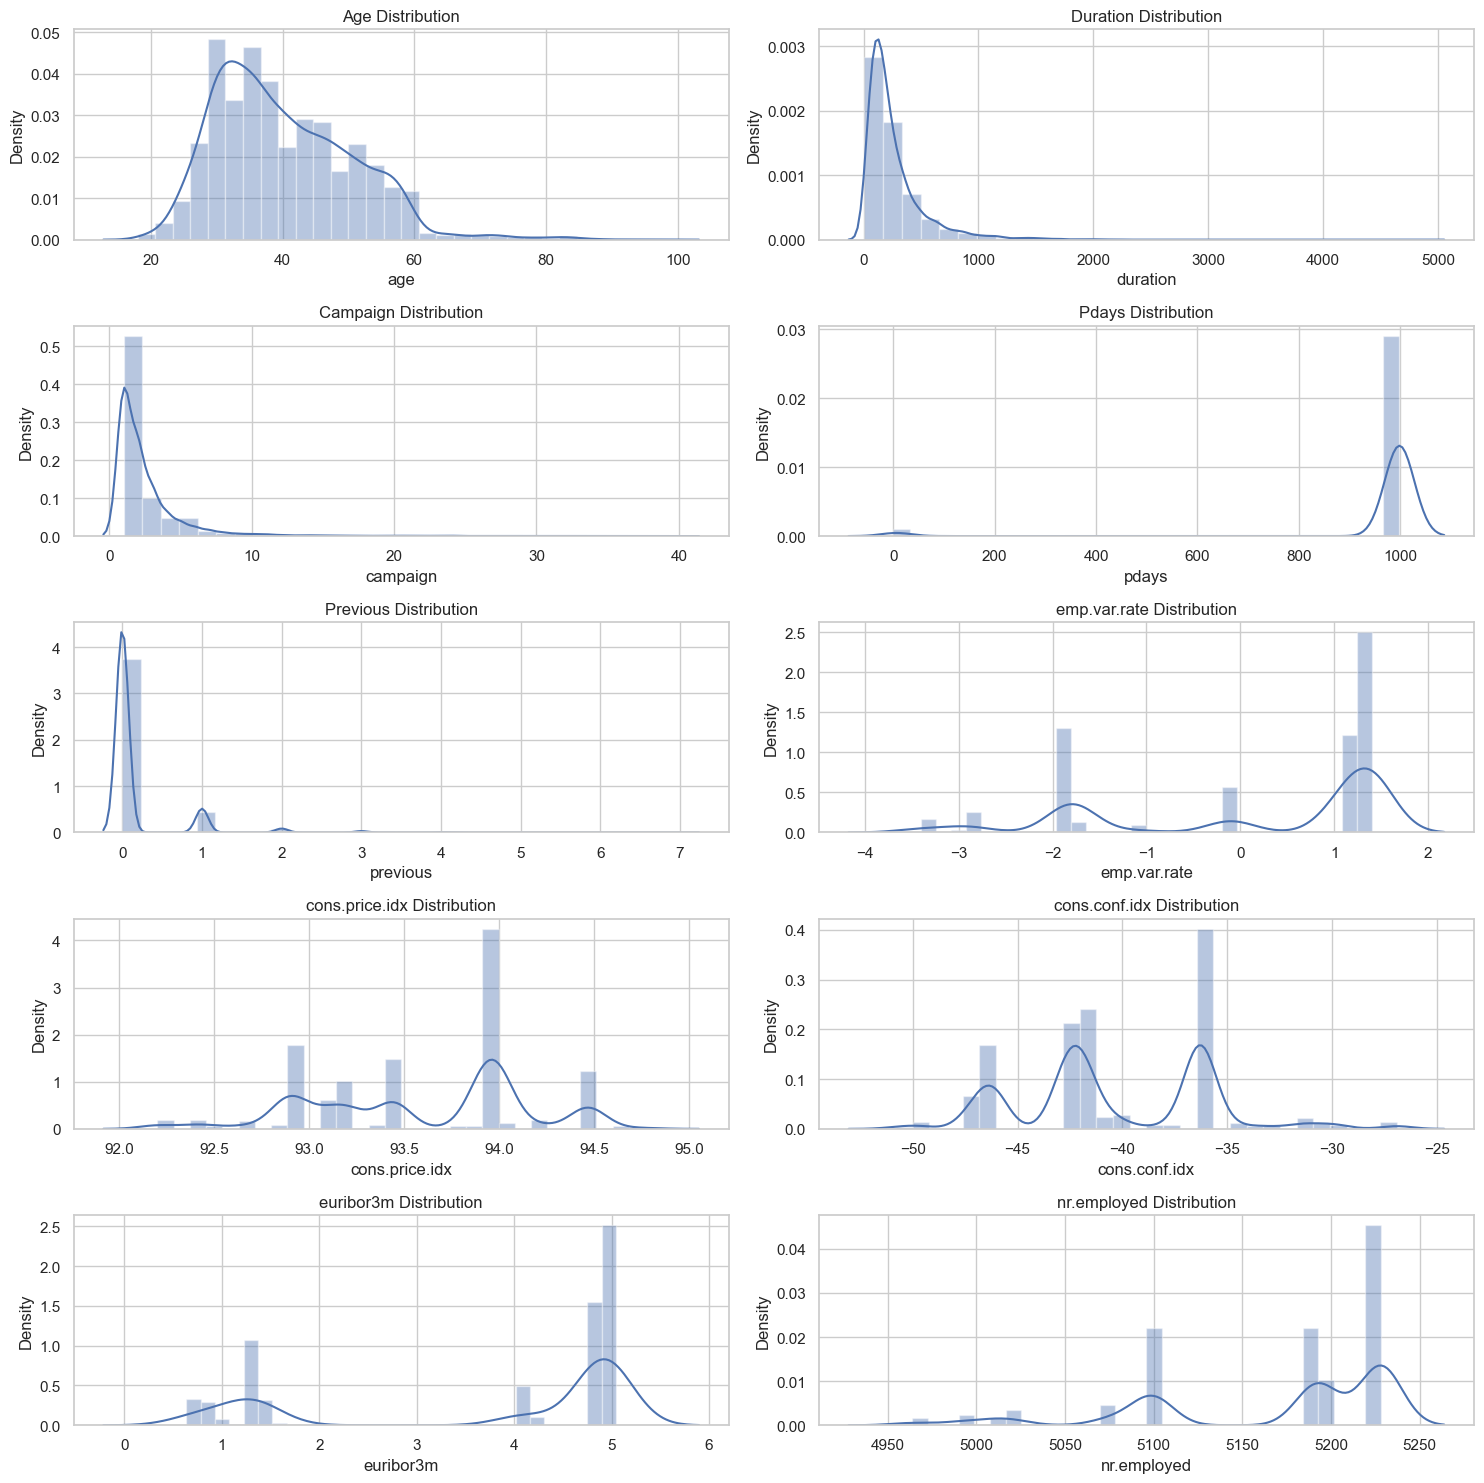

In [59]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure for multiple subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Histograms for numerical variables
sns.distplot(sample_data['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.distplot(sample_data['duration'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Duration Distribution')

sns.distplot(sample_data['campaign'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Campaign Distribution')

sns.distplot(sample_data['pdays'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Pdays Distribution')

sns.distplot(sample_data['previous'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Previous Distribution')

sns.distplot(sample_data['emp.var.rate'], bins=30, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('emp.var.rate Distribution')

sns.distplot(sample_data['cons.price.idx'], bins=30, kde=True, ax=axes[3, 0])
axes[3, 0].set_title('cons.price.idx Distribution')

sns.distplot(sample_data['cons.conf.idx'], bins=30, kde=True, ax=axes[3, 1])
axes[3, 1].set_title('cons.conf.idx Distribution')

sns.distplot(sample_data['euribor3m'], bins=30, kde=True, ax=axes[4, 0])
axes[4, 0].set_title('euribor3m Distribution')

sns.distplot(sample_data['nr.employed'], bins=30, kde=True, ax=axes[4, 1])
axes[4, 1].set_title('nr.employed Distribution')

# Adjusting layout
plt.tight_layout()
plt.show()

The histograms provide a visual representation of the distribution of various numerical variables in your dataset:

+ Age: Shows a relatively even distribution with a slight skew towards younger ages.
+ Duration: This variable is right-skewed, indicating most contacts have a short duration, with few long ones.
+ Campaign: Also right-skewed, indicating most clients were contacted a few times, with fewer instances of many contacts.
+ Pdays: Most values are at 999, indicating that most clients were not previously contacted.
+ Previous: Indicates that for most clients, there were no contacts before this campaign.
+ emp.var.rate:  bimodal distribution 
+ cons.price.idx: slightly right-skewed
+ cons.conf.idx: right-skewed with a sharp peak around -40 and a tail 
+ euribor3m: distribution with a peak 5 
+ nr.employed: a multimodal distribution with peaks around 5100 and 5200, suggesting there are typically two levels where the number of employees settles.
-> These visualizations help identify patterns and potential outliers, which are crucial for understanding the dataset's characteristics and guiding further analysis.

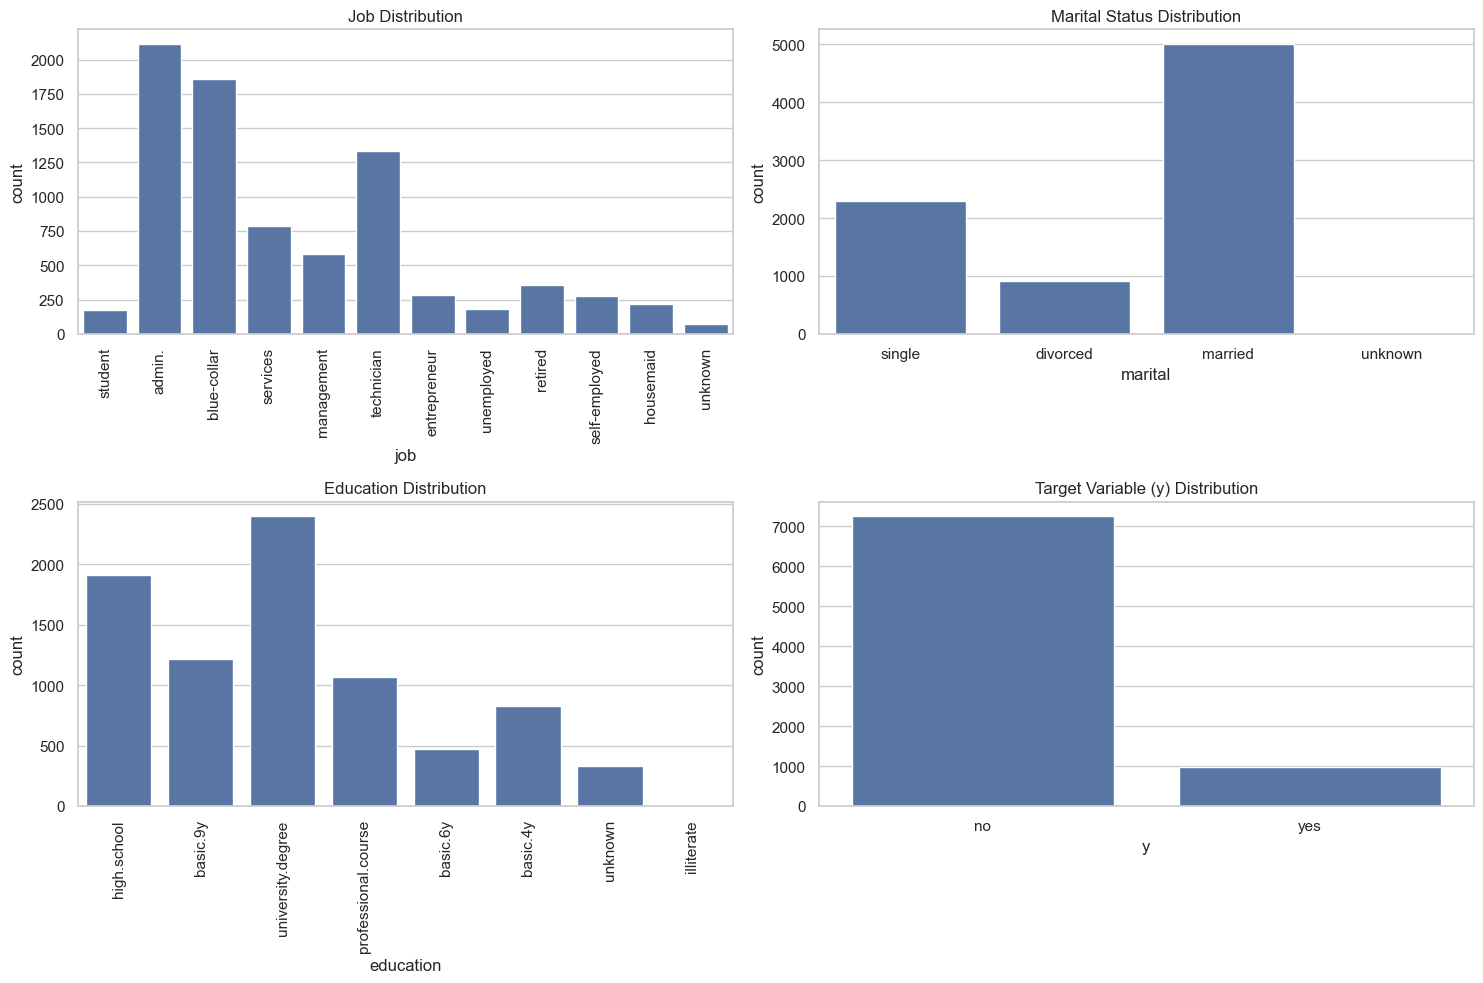

In [60]:
# Creating a figure for multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Bar charts for categorical variables
sns.countplot(x='job', data=sample_data, ax=axes[0, 0])
axes[0, 0].set_title('Job Distribution')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.countplot(x='marital', data=sample_data, ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Distribution')

sns.countplot(x='education', data=sample_data, ax=axes[1, 0])
axes[1, 0].set_title('Education Distribution')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.countplot(x='y', data=sample_data, ax=axes[1, 1])
axes[1, 1].set_title('Target Variable (y) Distribution')

# Adjusting layout
plt.tight_layout()
plt.show()

The bar charts illustrate the frequency distribution of various categorical variables in your dataset:

+ Job Distribution: Shows the diversity of job roles in the dataset, with some roles being more frequent than others.
+ Marital Status Distribution: Indicates the distribution of marital status among the individuals in the dataset.
+ Education Distribution: Highlights the educational background of the individuals, showing a variety of educational levels.
+ Target Variable (y) Distribution: Provides insight into the balance of the dataset regarding the target variable. This is crucial for understanding the dataset's skewness towards a particular outcome, which is important for modeling and analysis.
-> From these visualizations, we can start to understand the demographic and socio-economic composition of the dataset, which can be essential for further analysis, especially when considering the context of the data (e.g., a marketing campaign).

### Question 1: Do the job backgrounds and education levels affect customers’ responding rate significantly?

+ Method: Chi-squared Test of Independence.
 
1. Job Backgrounds Hypothesis:

+ Null Hypothesis (H0): Job backgrounds do not affect customers' responding rate to subscribing to a term deposit. => This hypothesis suggests that there is no significant relationship between the Job Backgrounds of a customer and their propensity to subscribe to a term deposit.

2.  Education Levels Hypothesis:

+ Null Hypothesis (H0): Education levels do not affect customers' responding rate to subscribing to a term deposit. => This hypothesis suggests that there is no significant relationship between the education level of a customer and their propensity to subscribe to a term deposit.


In [61]:
# Creating contingency tables
pd_job = pd.crosstab(sample_data['job'], sample_data['y'])
pd_education = pd.crosstab(sample_data['education'], sample_data['y'])


In [62]:
# chi2 job background
chi2_contingency(pd_job)

(193.2594945509535,
 1.8572135365688706e-35,
 11,
 array([[1863.65440641,  251.34559359],
        [1634.55268269,  220.44731731],
        [ 248.48725419,   33.51274581],
        [ 194.73646516,   26.26353484],
        [ 513.71655742,   69.28344258],
        [ 312.81196892,   42.18803108],
        [ 245.84377276,   33.15622724],
        [ 690.82981306,   93.17018694],
        [ 154.20308327,   20.79691673],
        [1178.1115562 ,  158.8884438 ],
        [ 161.25236708,   21.74763292],
        [  60.80007283,    8.19992717]]))

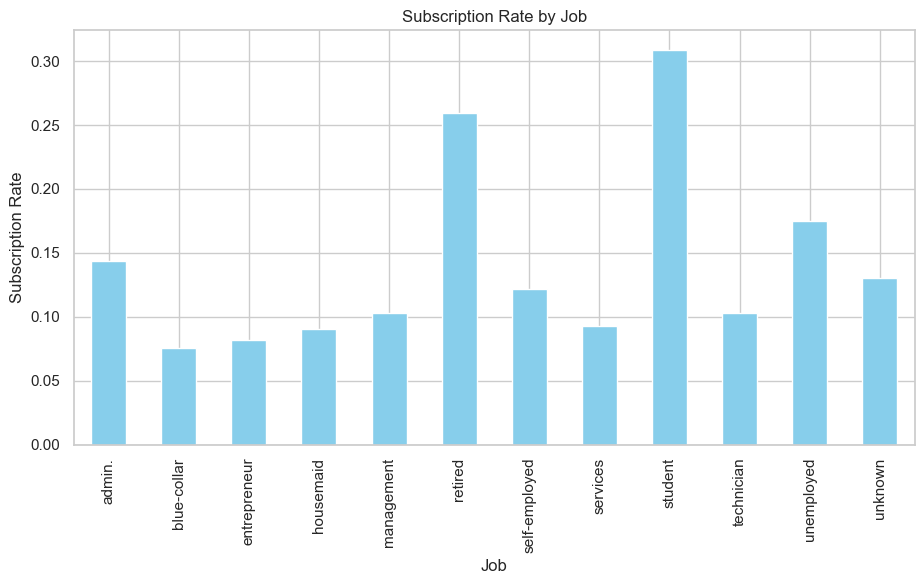

In [63]:
pd_job = pd.crosstab(sample_data['job'], sample_data['y'])

pd_job['subscription_rate'] = pd_job['yes'] / (pd_job['yes'] + pd_job['no'])


# Plotting the insights
plt.figure(figsize=(18, 6))

# Plot for Insight 1
plt.subplot(1, 2, 1)
pd_job['subscription_rate'].plot(kind='bar', color='skyblue')
plt.title('Subscription Rate by Job')
plt.xlabel('Job')
plt.ylabel('Subscription Rate')


plt.tight_layout()
plt.show()


+ Chi-square statistic: 193.26
+ p-value: 1.86e-35
+ Degrees of freedom: 11
+ Expected frequencies: [[1863.65, 251.35], [1634.55, 220.45], ..., [60.80, 8.20]]
-> With such a low p-value (significantly below 0.05),reject the null hypothesis of independence. there is significant relationship between the Job Backgrounds of a customer and their propensity to subscribe to a term deposit

In [64]:
# chi2 education level
chi2_contingency(pd_education)

(43.52410763299087,
 2.6418232333147436e-07,
 7,
 array([[7.29600874e+02, 9.83991260e+01],
        [4.18551226e+02, 5.64487740e+01],
        [1.07060998e+03, 1.44390022e+02],
        [1.68742231e+03, 2.27577689e+02],
        [2.64348143e+00, 3.56518572e-01],
        [9.43722870e+02, 1.27277130e+02],
        [2.11478514e+03, 2.85214858e+02],
        [2.91664118e+02, 3.93358825e+01]]))

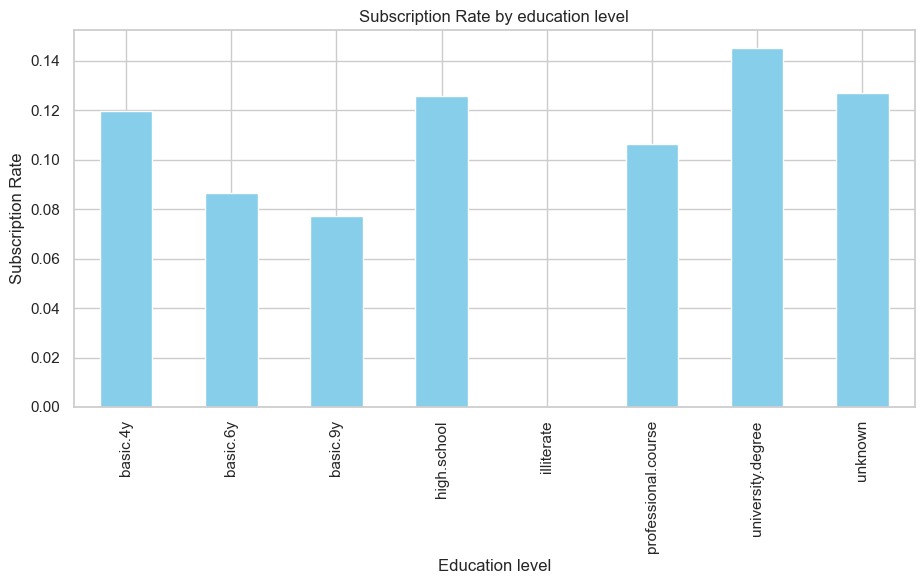

In [19]:


pd_education['subscription_rate'] = pd_education['yes'] / (pd_education['yes'] + pd_education['no'])


# Plotting the insights
plt.figure(figsize=(18, 6))

# Plot for Insight 1
plt.subplot(1, 2, 1)
pd_education['subscription_rate'].plot(kind='bar', color='skyblue')
plt.title('Subscription Rate by education level')
plt.xlabel('Education level')
plt.ylabel('Subscription Rate')


plt.tight_layout()
plt.show()


+ Chi-square statistic: 43.52
+ p-value: 2.64e-07
+ Degrees of freedom: 7
+ Expected frequencies: [[729.60, 98.40], [418.55, 56.45], ..., [291.66, 39.34]]
-> With such a low p-value (significantly below 0.05),reject the null hypothesis of independence. there is significant relationship between the education level of a customer and their propensity to subscribe to a term deposit.


#### In conclusion, both job backgrounds and education levels have a significant effect on customers' responding rates in this dataset. Customers with different jobs and education levels respond differently to the subscription of term deposits.

### Question 2:  Is there a relationship between customers' response rates and the contact communication type?

+ Method: Chi-squared Test of Independence.

+ Null Hypothesis (H0): There is no statistically significant relationship between customers' response rates and the contact communication type.

In [20]:
pd_commutype = pd.crosstab(sample_data['contact'], sample_data['y'])
chi2_contingency(pd_commutype)

(176.10482916162675,
 3.4351413402648e-40,
 1,
 array([[4594.37072105,  619.62927895],
        [2664.62927895,  359.37072105]]))

+ Chi-square statistic:176.10
+ p-value: 3.4351413402648e-40
+ Degrees of freedom: 1
-> With such a low p-value (significantly below 0.05),reject the null hypothesis of independence. There is statistically significant relationship between customers' response rates and the contact communication type.

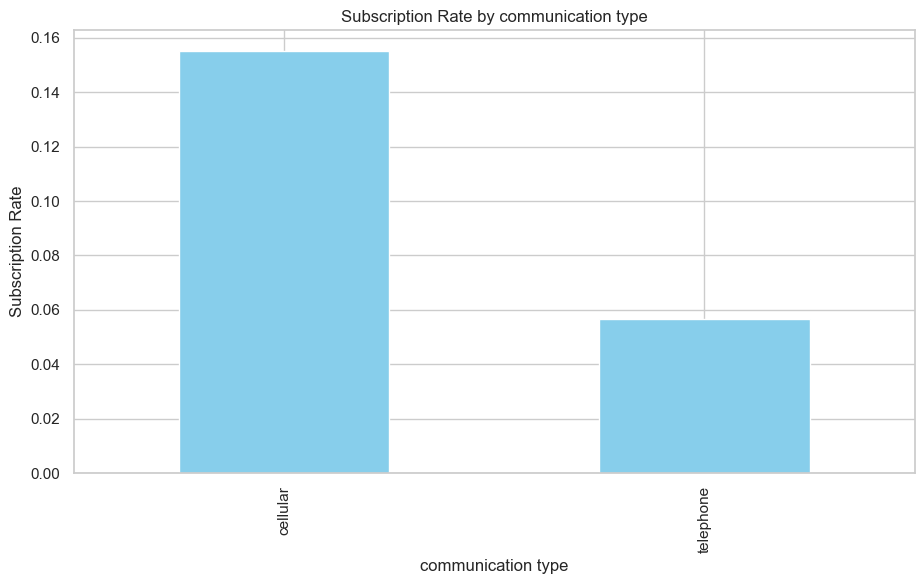

In [21]:
pd_commutype['subscription_rate'] = pd_commutype['yes'] / (pd_commutype['yes'] + pd_commutype['no'])


# Plotting the insights
plt.figure(figsize=(18, 6))

# Plot for Insight 1
plt.subplot(1, 2, 1)
pd_commutype['subscription_rate'].plot(kind='bar', color='skyblue')
plt.title('Subscription Rate by communication type')
plt.xlabel('communication type')
plt.ylabel('Subscription Rate')


plt.tight_layout()
plt.show()

### Question 3: Is the contact communication type -responses relationship identified in the previous question the same for all age groups?
+ Method: Logistic Regression
+ Null Hypothesis (H0): The relationship between contact communication type and customer responses is the same across all age groups

In [22]:
# Categorizing age into groups and encoding
le = LabelEncoder()
age_bins = [0, 30, 45, 60, 120]  # Age groups: 18-30, 31-45, 46-60, 61+
age_labels = [1, 2, 3, 4]  # Encoding age groups as 1, 2, 3, 4
sample_data['age_group_encoded'] = pd.cut(sample_data['age'], bins=age_bins, labels=age_labels, right=False)
# Encoding 'contact' 
sample_data['contact_encoded_new'] = sample_data['contact'].map({'cellular': 1, 'telephone': 2})

sample_data['response_encoded'] = le.fit_transform(sample_data['y'])



# Building the logistic regression model formula with the new age groups and contact encoding
new_age_model_formula = 'response_encoded ~ age_group_encoded + contact_encoded_new'

categorical_vars = ['marital', 'education', 'job', 'housing', 'loan', 'poutcome']
for var in categorical_vars:
    sample_data[var + '_encoded'] = le.fit_transform(sample_data[var])

# Selecting additional independent variables (predictors)
additional_predictors = [var + '_encoded' for var in categorical_vars]


# Adding the control variables to the model formula
new_age_model_formula += ' + ' + ' + '.join(additional_predictors)

# Fitting the enhanced logistic regression model with new age groups and contact encoding
enhanced_logit_model_age_groups = smf.logit(formula=new_age_model_formula, data=sample_data).fit()

# Getting the summary of the new model
enhanced_model_summary_age_groups = enhanced_logit_model_age_groups.summary()
print(enhanced_model_summary_age_groups)


Optimization terminated successfully.
         Current function value: 0.339222
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       response_encoded   No. Observations:                 8238
Model:                          Logit   Df Residuals:                     8227
Method:                           MLE   Df Model:                           10
Date:                Thu, 18 Jan 2024   Pseudo R-squ.:                 0.06962
Time:                        09:54:45   Log-Likelihood:                -2794.5
converged:                       True   LL-Null:                       -3003.6
Covariance Type:            nonrobust   LLR p-value:                 1.235e-83
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.6920      0.216     -7.841      0.000      -2.115      

1. Age Groups:

+ Age Group 18-30 (Reference Group)
+ Age Group 31-45 (Coefficient: -0.3165, p = 0.002)
+ Age Group 46-60 (Coefficient: -0.2663, p = 0.024)
+ Age Group 61+ (Coefficient: 1.2727, p < 0.001)
+ Contact Type (contact_encoded_new, Coefficient: -1.0725, p < 0.001): The contact type is a significant predictor.

2. Control Variables:
+ Variables like marital_encoded, education_encoded, and poutcome_encoded show significant p-values, indicating their influence on the response.

3. Result 
+ The encoded age groups show varying coefficients, indicating that the likelihood of a positive response varies across different age groups. Specifically, the Age Group 61+ shows a significantly higher likelihood of a positive response compared to the reference group (18-30).

+ The significance of the contact type indicates its impact on customer response, and the negative coefficient suggests that one type of contact (likely telephone, based on the encoding) is associated with a lower probability of a 'yes' response compared to the other.


-> Given the significant differences across age groups and the significant effect of contact type, we can conclude that the relationship between contact communication type and customer responses is not the same across all age groups. Therefore, we reject the null hypothesis, suggesting that age group and contact type together influence customer responses.

-> This result indicates that adding age groups as categorical variables and including more control variables provides a more detailed understanding of the dynamics between contact type, age groups, and customer responses.

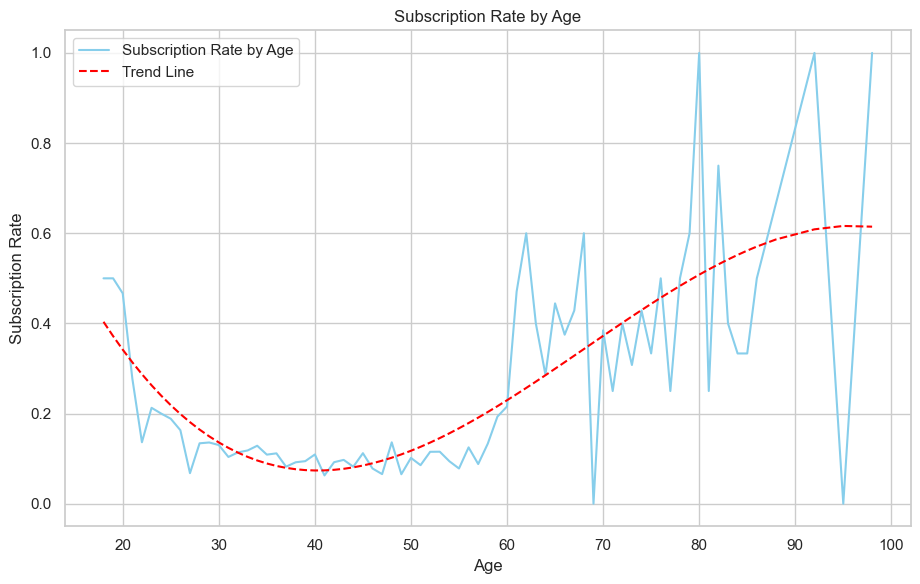

In [23]:
# Reusing the provided code and integrating the trend line

pd_age = pd.crosstab(sample_data['age'], sample_data['y'])
pd_age['subscription_rate'] = pd_age['yes'] / (pd_age['yes'] + pd_age['no'])

# Preparing data for the trend line
ages = pd_age.index
subscription_rates_by_age = pd_age['subscription_rate']

# Fitting a polynomial for trend line
degree = 3  # Degree of the polynomial
p = Polynomial.fit(ages, subscription_rates_by_age, degree)

# Plotting the line chart with a trend line
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(ages, subscription_rates_by_age, color='skyblue', label='Subscription Rate by Age')
plt.plot(ages, p(ages), color='red', linestyle='--', label='Trend Line')
plt.title('Subscription Rate by Age')
plt.xlabel('Age')
plt.ylabel('Subscription Rate')
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
pd_month = pd.crosstab(sample_data['month'], sample_data['y'])
chi2_contingency(pd_month)

(627.9984217881643,
 2.0433062986597787e-129,
 9,
 array([[ 408.85846079,   55.14153921],
        [1081.18390386,  145.81609614],
        [  37.88990046,    5.11009954],
        [1327.9088371 ,  179.0911629 ],
        [ 934.03010439,  125.96989561],
        [  90.75952901,   12.24047099],
        [2425.83479   ,  327.16521   ],
        [ 733.1255159 ,   98.8744841 ],
        [ 123.36246662,   16.63753338],
        [  96.04649187,   12.95350813]]))

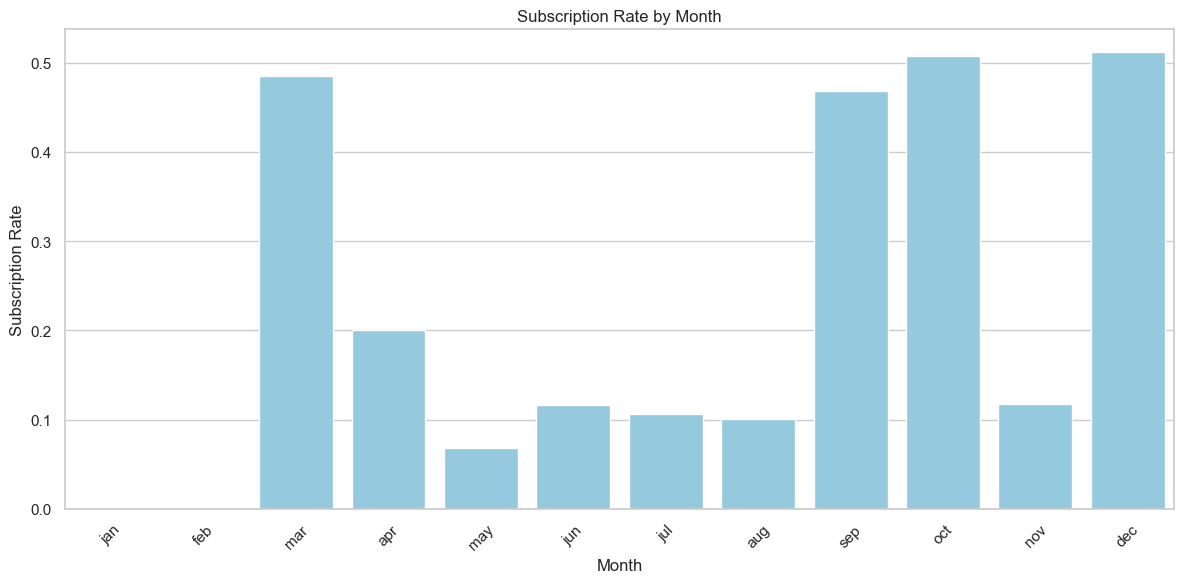

In [25]:
# Calculating subscription rate by month
pd_month['subscription_rate'] = pd_month['yes'] / (pd_month['yes'] + pd_month['no'])

# Sorting the data by month for a meaningful trend line
months_sorted = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_subscription = pd_month.reindex(months_sorted)

# Sorting the data by month for a meaningful display
month_subscription_sorted = pd_month.reindex(months_sorted)

# Creating the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=month_subscription_sorted.index, y='subscription_rate',
            data=month_subscription_sorted, color='skyblue')
plt.title('Subscription Rate by Month')
plt.xlabel('Month')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
pd_duration = pd.crosstab(sample_data['duration'], sample_data['y'])
chi2_contingency(pd_duration)

(3134.9333776524554,
 2.5581513842186326e-207,
 1045,
 array([[0.88116048, 0.11883952],
        [5.28696286, 0.71303714],
        [9.69276523, 1.30723477],
        ...,
        [0.88116048, 0.11883952],
        [0.88116048, 0.11883952],
        [0.88116048, 0.11883952]]))

### Question 4:  two interesting insights from analysing the data

based on the chart, comparison of subscription rates by two types of communication: cellular and telephone.We can observe the following insights:

1. The subscription rate for cellular communication is significantly higher than for telephone communication.
2. The exact subscription rate for cellular communication is approximately 0.15, or 15%, whereas for telephone communication it is around 0.05, or 5%.
-> Insight 1:  This suggests that cellular communication is three times more effective in achieving subscriptions than telephone communication.

based on the line chart depicts the subscription rate by age, with a superimposed trend line:

1. High Variability: The subscription rate fluctuates significantly across different ages. This could indicate that certain ages are more likely to subscribe than others, or it might suggest variability in the data collection process.

2. Decline in Early Ages: There is a sharp decline in the subscription rate as age increases from 20 to around 30. This might suggest that the youngest age group depicted here is highly engaged with the subscription, possibly due to a product or service that appeals to a younger demographic.

3. Overall Increasing Trend: Despite the variability, the trend line (dashed red line) indicates an overall increase in the subscription rate as age increases. This suggests that, on average, older individuals are more likely to subscribe than younger ones.

4. Peaks and Troughs: There are noticeable peaks and troughs; for example, there is a peak around the age of 60 and another around 90. These could be outliers or could represent age groups with a particularly high subscription rate.

-> Insight 2:  the chart shows that age is a factor in subscription rates, with a general trend of increasing subscription with age.


### Question 5: present the results of using one classification algorithm? 
+ Neural network algorithm for predicting whether a client has subscribed to a term deposit

In [43]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separating the features and the target variable
X = data.drop('y', axis=1)
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Converting target variable to binary format

# Identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Creating transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handling missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the preprocessing transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train.shape, X_test.shape  # Checking the shape of the processed data

((32950, 63), (8238, 63))

In [39]:
X_test

array([[ 1.62735672,  0.43650453, -0.56620036, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.4357066 ,  0.10504168, -0.20624161, ...,  0.        ,
         1.        ,  0.        ],
       [-0.67244473, -0.79299138, -0.56620036, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.57328106, -0.44611166,  3.39334585, ...,  1.        ,
         0.        ,  0.        ],
       [-0.86409485,  4.12113804, -0.20624161, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81900684, -0.25725492, -0.20624161, ...,  0.        ,
         1.        ,  0.        ]])

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



2024-01-22 07:46:56.868717: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [42]:
y_train

12556    0
35451    0
30592    0
17914    0
3315     0
        ..
6265     0
11284    0
38158    1
860      0
15795    0
Name: y, Length: 32950, dtype: int64

In [29]:
# Setting a random seed for reproducibility
tf.random.set_seed(42)

# Neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/100
824/824 [==============================] - 2s 1ms/step - loss: 0.2476 - accuracy: 0.8918 - val_loss: 0.1969 - val_accuracy: 0.9111
Epoch 2/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1960 - accuracy: 0.9080 - val_loss: 0.1931 - val_accuracy: 0.9094
Epoch 3/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1911 - accuracy: 0.9105 - val_loss: 0.1919 - val_accuracy: 0.9105
Epoch 4/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1874 - accuracy: 0.9123 - val_loss: 0.1902 - val_accuracy: 0.9131
Epoch 5/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1861 - accuracy: 0.9101 - val_loss: 0.1913 - val_accuracy: 0.9123
Epoch 6/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1832 - accuracy: 0.9136 - val_loss: 0.1875 - val_accuracy: 0.9132
Epoch 7/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1824 - accuracy: 0.9159 - val_loss: 0.1896 - val_accuracy: 0.9103

Epoch 58/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1504 - accuracy: 0.9307 - val_loss: 0.2047 - val_accuracy: 0.9083
Epoch 59/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1481 - accuracy: 0.9324 - val_loss: 0.2048 - val_accuracy: 0.9074
Epoch 60/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1482 - accuracy: 0.9301 - val_loss: 0.2077 - val_accuracy: 0.9108
Epoch 61/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1479 - accuracy: 0.9303 - val_loss: 0.2059 - val_accuracy: 0.9094
Epoch 62/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1469 - accuracy: 0.9333 - val_loss: 0.2068 - val_accuracy: 0.9071
Epoch 63/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1475 - accuracy: 0.9315 - val_loss: 0.2059 - val_accuracy: 0.9103
Epoch 64/100
824/824 [==============================] - 1s 1ms/step - loss: 0.1457 - accuracy: 0.9322 - val_loss: 0.2070 - val_accuracy:

In [30]:
history

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [32]:
y_pred = model.predict(X_test)

258/258 [==============================] - 0s 707us/step


In [34]:
y_pred_classes = np.round(y_pred).astype(int)  # Convert probabilities to class labels


In [36]:
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7086  217]
 [ 539  396]]


+ True Negatives (TN): 7086 predictions where the model correctly predicted the negative class (e.g., the client did not subscribe to a term deposit).
+ False Positives (FP): 217 predictions where the model incorrectly predicted the positive class (e.g., the client subscribed to a term deposit when they actually did not).
+ False Negatives (FN): 539 predictions where the model incorrectly predicted the negative class (e.g., the client did not subscribe when they actually did).
+ True Positives (TP): 396 predictions where the model correctly predicted the positive class (e.g., the client subscribed to a term deposit).


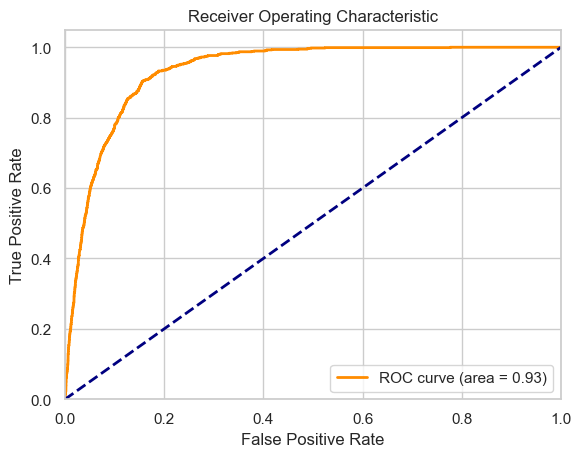

In [37]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- ROC Curve:
+ The ROC curve is a plot that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

- The AUC (Area Under the Curve) value is 0.93, as indicated by the chart. 
+ AUC: The area under the ROC curve. An AUC of 0.93 is considered excellent. It means that there is a 93% chance that the model will be able to distinguish between the positive class and the negative class. The value of 1 represents a perfect test; an area of 0.5 represents a worthless test.

Interpretation of Results:
+ The model has a high AUC, indicating strong predictive capabilities.
+ However, the number of false negatives is relatively high (539), which could be problematic if the cost of missing out on potential subscribers is significant.
+ The model is more conservative in predicting positives since the number of false positives is lower (217) compared to false negatives.
